# Is Fauchi a cat or not?

The file training1.h5 contains trained weights made on a computing engine on Google Colab. Training has been done on a set of images of dogs and cats.

The training has been done using transfer learning with VGG16 convolutional layers. The downloadable training set training1.h5 contains weights of the 3 dense layers behind.

The following steps have to be done for a classification to make sure, that our images match the image format of the training data.
* Download the trainging file from Google Drive (if not yet present)
* Read in an image of your choice and preprocess:
 * resize 224x224
 * make numpy array from data
 * apply preprocess_image from VGG16
 * run VGG16 prediction to create input for our own trained model
 * run prediction on our own model
 

Based on: DeepLearningAndAI/360 - Projekt Hund Katze/Vorhersagen machen (Musterloesung).ipynb

## Prepare variables etc..

In [7]:
testimg_dir = "testimages"

## Create our model from pretrained weights
Weights for our dense layers have been trained on Google Colab. See notebook there. These weights can be downloaded from Google Drive. 

In [1]:
# We first might want to install googledrivedownloader
# https://pypi.org/project/googledrivedownloader/
!pip install googledrivedownloader

TODO: download only, if file does not yet exist. Check download options. For some reason, this package does not support showsize parameter, while package code on pypi has this available.

In [49]:
from google_drive_downloader import GoogleDriveDownloader as DL

DL.download_file_from_google_drive(file_id='19CCGBcr2ytqNnGfImAcJvNUroIMKcrZP',
                                       dest_path='testmodels/training1.h5',
                                       unzip=False)
                                       #showsize=True)
print("DONE")

DONE


Create our model from downloaded model dataset

In [3]:
from keras.models import load_model

print("Creating model from downloaded training data....")
cat_model = load_model("testmodels/training1.h5")
print("DONE")

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


## Read in images to be tested
We have all images in a separate directory

In [50]:
import os
import numpy as np
from keras.applications.vgg16 import preprocess_input
from PIL import Image

images = np.empty([0, 224, 224,3])

print("Preparing images in subdirectory '%s'..." % testimg_dir)
for subdir, dirs, files in os.walk(testimg_dir):
    for file in files:
        img = Image.open(os.path.join(subdir, file))
        # scale to required 224x224 for VGG16
        img = img.resize((224, 224), Image.LANCZOS)
        # make sure, we have 3 channels (R G B) and convert into numpy array
        img = np.asarray(img).reshape(1, 224, 224, 3)
        # apply the VGG16 preprocessing
        img = preprocess_input(img)
        # Add result to our array of images to be checked
        images = np.append(images, img, axis=0)
        
print("DONE. Images shape: %s" % str(images.shape))

Preparing images in subdirectory 'testimages'...
DONE. Images shape: (18, 224, 224, 3)


## Load VGG16 model
The model is loaded and a predition is done for all images to be tested. The output of this is the input for our dense layers.

In [51]:
from keras.applications.vgg16 import VGG16

print("Process images with VGG16 model...")
vgg16_model = VGG16(include_top=False, input_shape=(224, 224, 3))
X_after_vgg = vgg16_model.predict(images)
print("DONE. Shape: %s" % str(X_after_vgg.shape))

Process images with VGG16 model...
DONE. Shape: (18, 7, 7, 512)


## Predict probability for `cat` for all images

In [52]:
results = cat_model.predict(X_after_vgg)
results

array([[1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [9.9997681e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [2.9802322e-07],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9999988e-01],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [9.9999976e-01],
       [1.2563742e-14]], dtype=float32)

In [38]:
# see https://stackoverflow.com/questions/46615554/how-to-display-multiple-images-in-one-figure-correctly/46616645
# try to make image with all pictures, mark as correct or not

In [53]:
files

['!Speelgoed_Kat_Small.jpg',
 '679009_poster_l.jpg',
 'BBSAlXS.img.jpg',
 'DSC02495.jpg',
 'DSC02510.jpg',
 'DSC02527.jpg',
 'fauchi-001.jpg',
 'fauchi-002.jpg',
 'Fauchi-1.jpg',
 'Fauchi-2.jpg',
 'Fauchi-3.jpg',
 'Fauchi-5.jpg',
 'fliegende_katzen_katze_flying_cat_9-e1536057072967.jpg',
 'Gaense.jpg',
 'Gaense2.jpg',
 'hund-m-spielen-300-300.jpg',
 'Schilderwald.jpg',
 'specht001.jpg']

### Result visualization
Quick and dirty: show the images. All images which have not been classified as cat are shown with some transparency.

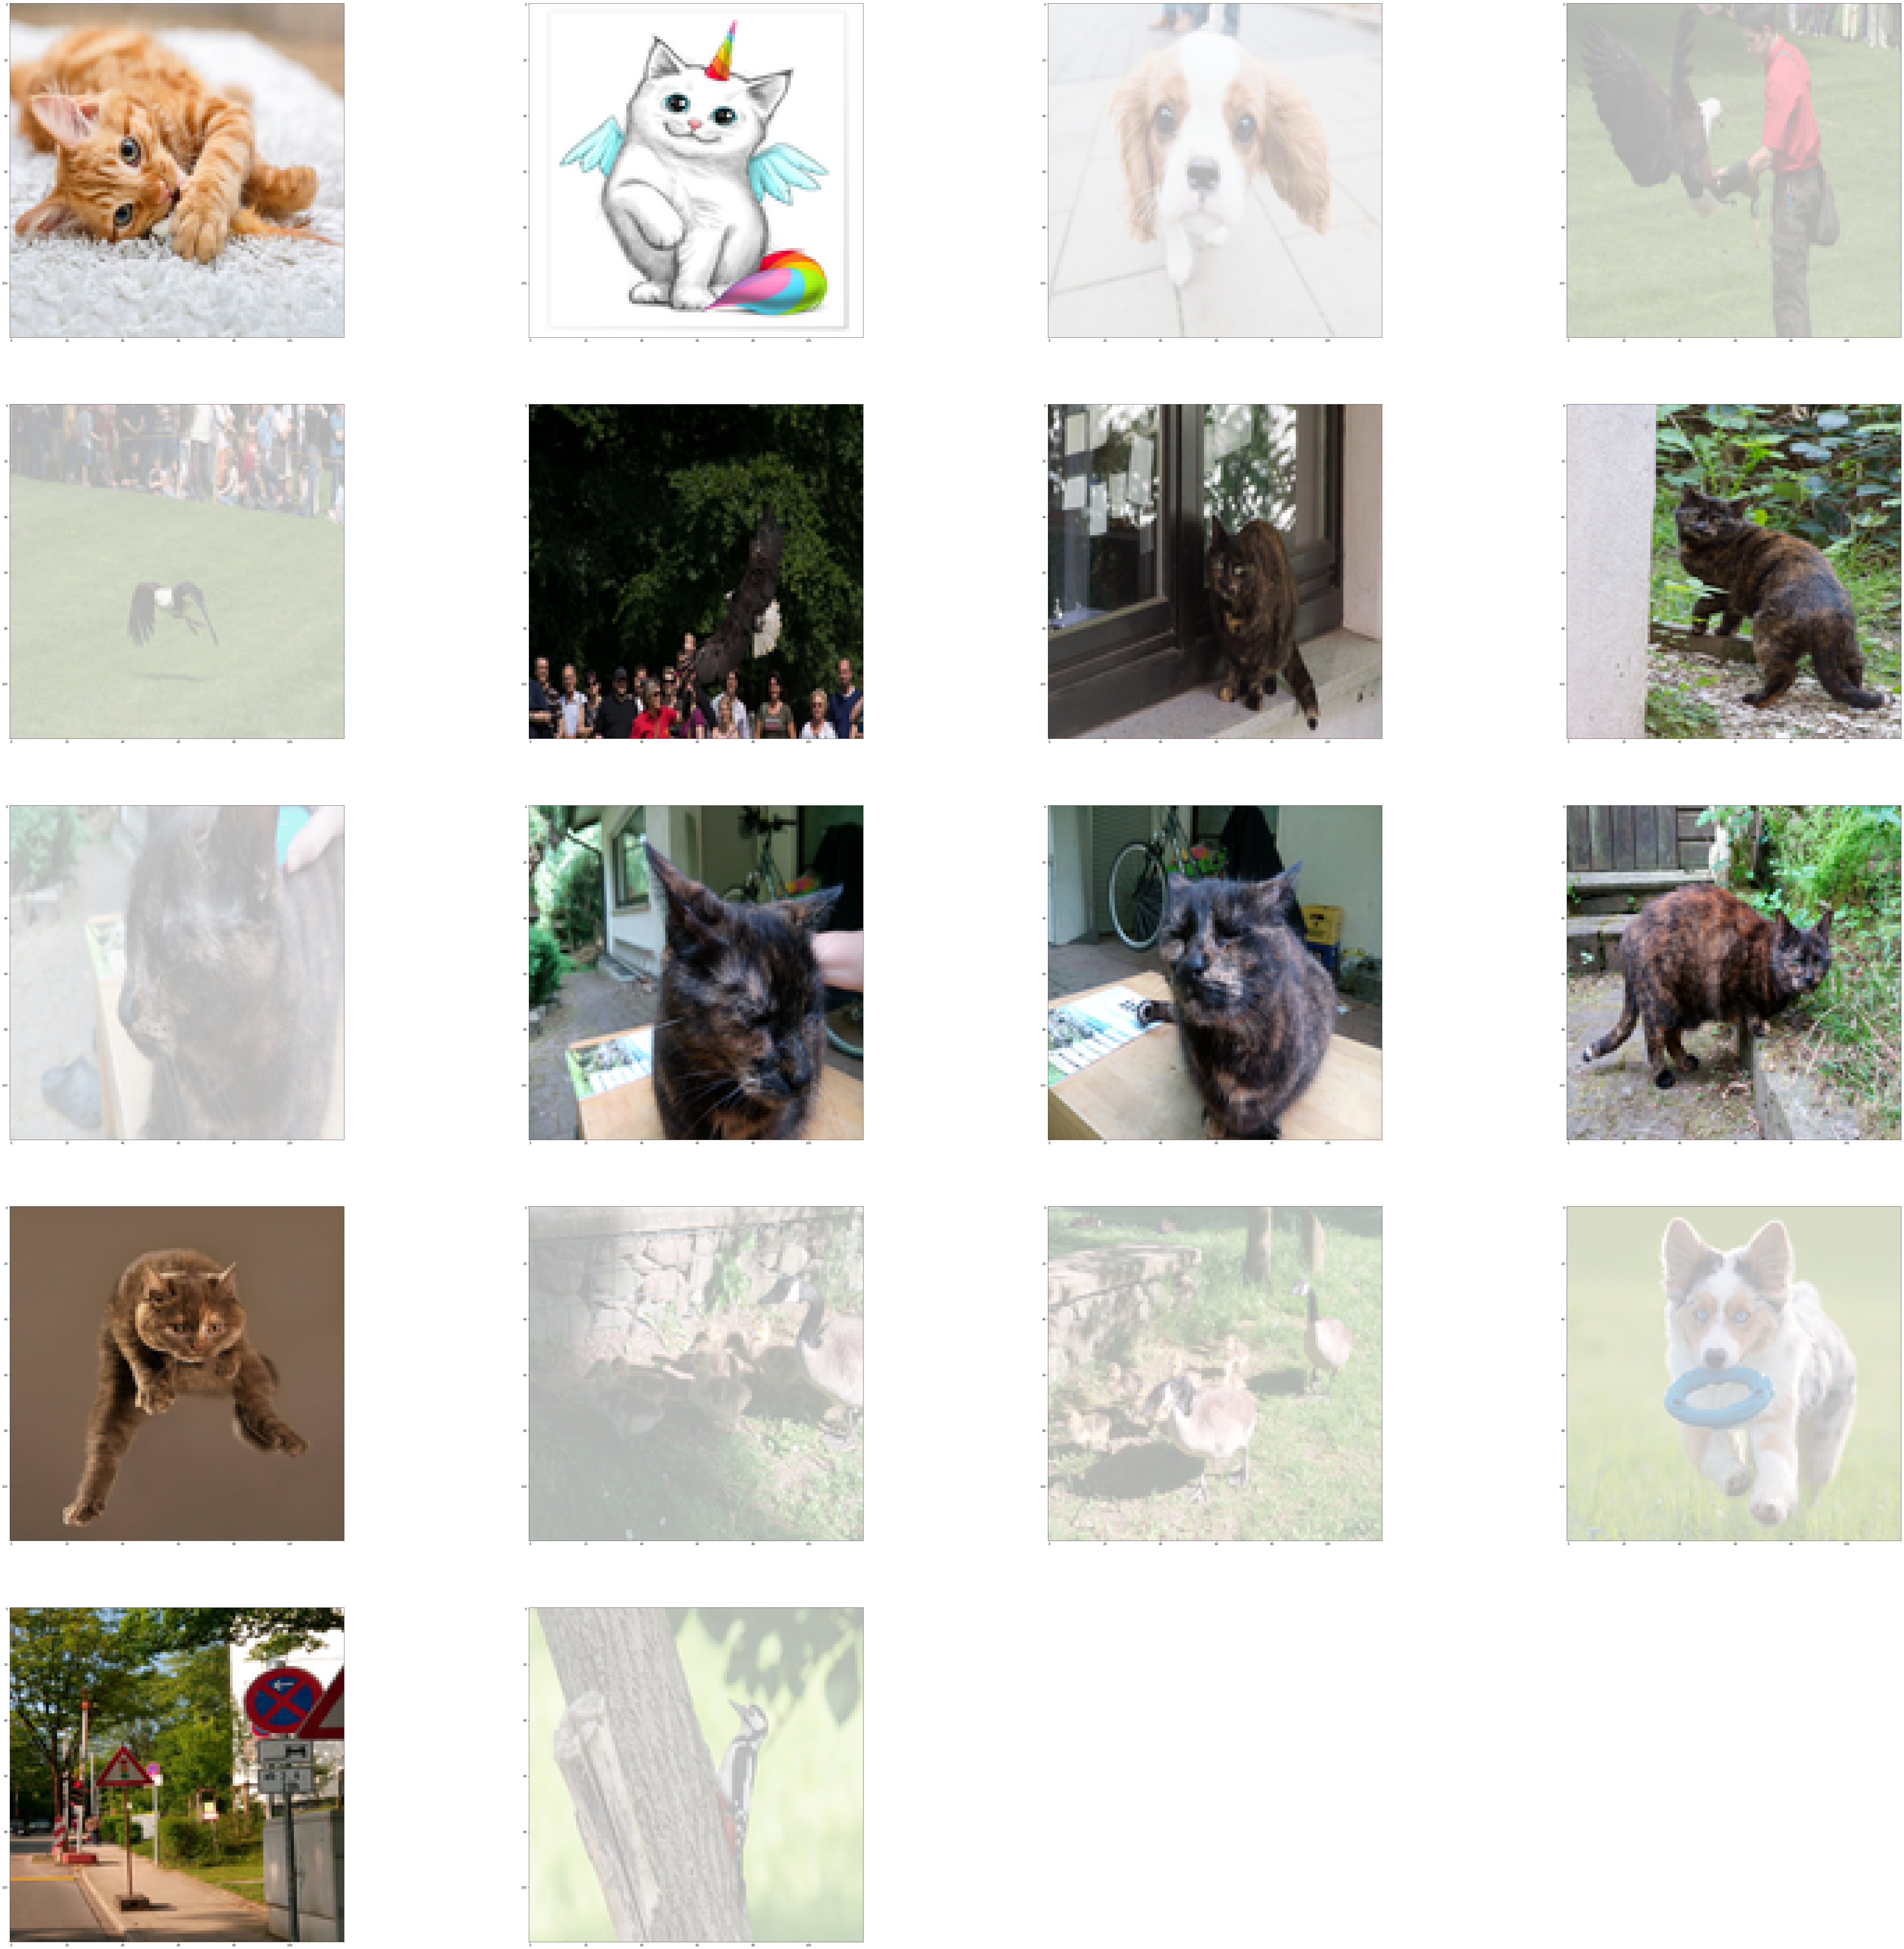

In [56]:
%matplotlib inline
#plt.imshow(image[0])
#plt.show()
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(120, 120))
columns = 4
rows = 5

for subdir, dirs, files in os.walk(testimg_dir):
    i = 1
    for file in files:
        img = Image.open(os.path.join(subdir, file))
        img = img.resize((120, 120), Image.LANCZOS)
        fig.add_subplot(rows, columns, i)
        plt.imshow(img, alpha = 1.0 if results[i-1] > 0.5 else 0.3)
        i = i + 1

plt.show()
        
        